In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
USING_COLAB = False

In [3]:
root_path = "/content/" if USING_COLAB else './data/'

X_train_original = pd.read_csv(root_path+'X_train_cleaned.csv')
X_train_pca_original = pd.read_csv(root_path+'X_train_pca.csv')
Y_train_original = pd.read_csv(root_path+'y_train_ZAN5mwg.csv')
X_test = pd.read_csv(root_path+'X_test_cleaned.csv')
X_test_pca = pd.read_csv(root_path+'X_test_pca.csv')


X_train, X_val, Y_train, Y_val = train_test_split(X_train_original.drop('ID', axis=1), Y_train_original, test_size=0.2, random_state=0)
X_train_pca, X_val_pca, Y_train_pca, Y_val_pca = train_test_split(X_train_pca_original, Y_train_original, test_size=0.2, random_state=0)

In [4]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from scipy.stats import spearmanr
from sklearn.tree import DecisionTreeRegressor

In [5]:
def custom_scorer(y_true, y_pred):
    correlation, _ = spearmanr(y_true, y_pred)
    return correlation

custom_scorer = make_scorer(custom_scorer, greater_is_better=True)


In [6]:
def grid_search(param_grid, model, X_train, Y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    print("Best parameters: ", grid_search.best_params_)
    print("Best cross-validation spearman correlation coefficient: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

## Decision Trees

In [7]:
model_dtr = DecisionTreeRegressor()
param_grid_dtr = {
    'max_depth': [2, 5, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

best_model_dtr, best_params_dtr, best_score_dtr = grid_search(param_grid_dtr, model_dtr, X_train, Y_train['TARGET'])

preds = best_model_dtr.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation spearman correlation coefficient: 0.20
Spearman correlation on validation set: 0.14


In [8]:
model_dtr_pca = DecisionTreeRegressor()
param_grid_dtr_pca = {
    'max_depth': [2, 5, 7],
    'min_samples_split': [30, 40, 50, 60],
    'min_samples_leaf': [4, 6, 8, 10, 12]
}

best_model_pca, best_params_pca, best_score_pca = grid_search(param_grid_dtr_pca, model_dtr_pca, X_train_pca, Y_train['TARGET'])
preds = best_model_pca.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 30}
Best cross-validation spearman correlation coefficient: 0.17
Spearman correlation on validation set: 0.15


## Bagging

In [9]:
from sklearn.ensemble import BaggingRegressor

model_bag = BaggingRegressor()
param_grid_bagg = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.25, 0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

best_model_bag, best_params_bag, best_score_bag = grid_search(param_grid_bagg, model_bag, X_train, Y_train['TARGET'])

preds = best_model_bag.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Best cross-validation spearman correlation coefficient: 0.22
Spearman correlation on validation set: 0.16


In [10]:
model_bag_pca = BaggingRegressor()
param_grid_bagg_pca = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.25, 0.5, 0.75, 1.0],
    'max_features': [0.25, 0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

best_model_bag_pca, best_params_bag_pca, best_score_bag_pca = grid_search(param_grid_bagg_pca, model_bag_pca, X_train_pca, Y_train['TARGET'])

preds = best_model_bag_pca.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 0.25, 'n_estimators': 50}
Best cross-validation spearman correlation coefficient: 0.19
Spearman correlation on validation set: 0.06


## Random Forest

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 7],
    'min_samples_split': [30, 40, 50, 60],
    'min_samples_leaf': [4, 6, 8, 10, 12]
}

best_model_rf, best_params_rf, best_score_rf = grid_search(param_grid_rf, model_rf, X_train, Y_train['TARGET'])

preds = best_model_rf.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 30, 'n_estimators': 10}
Best cross-validation spearman correlation coefficient: 0.21
Spearman correlation on validation set: 0.20


In [12]:
model_pca_rf = RandomForestRegressor()
param_grid_pca_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 7],
    'min_samples_split': [30, 40, 50, 60],
    'min_samples_leaf': [4, 6, 8, 10, 12]
}

best_model_pca_rf, best_params_pca_rf, best_score_pca_rf = grid_search(param_grid_pca_rf, model_pca_rf, X_train_pca, Y_train['TARGET'])

preds = best_model_pca_rf.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 50, 'n_estimators': 50}
Best cross-validation spearman correlation coefficient: 0.21
Spearman correlation on validation set: 0.14


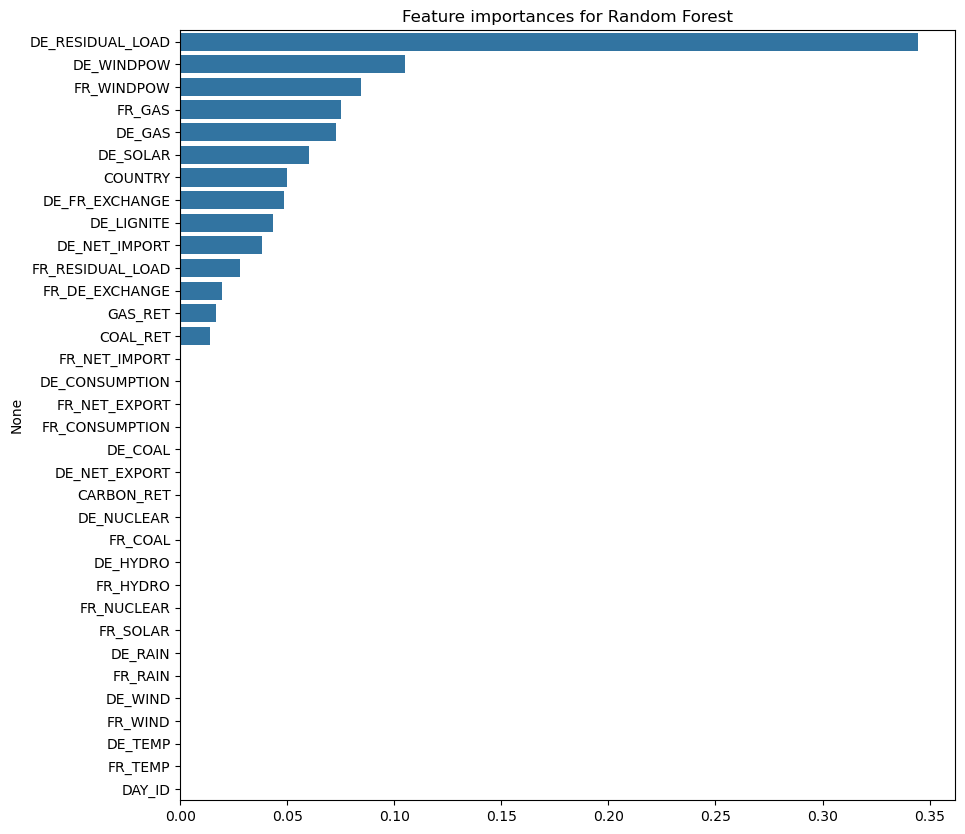

In [13]:
best_model_rf.fit(X_train, Y_train['TARGET'])
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
plt.title("Feature importances for Random Forest")
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.show()

## LightGBM

In [14]:
# @alexandro TODO
# from lightgbm import LGBMRegressor

# model_lgbm = LGBMRegressor()
# param_grid = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200]
# }

# best_model_lgbm, best_params_lgbm, best_score_lgbm = grid_search(param_grid, model_lgbm, X_train, Y_train['TARGET'])

# preds = best_model_lgbm.predict(X_val)
# print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

In [15]:
# model_pca_lgbm = LGBMRegressor()
# param_grid_pca = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200]
# }

# best_model_pca_lgbm, best_params_pca_lgbm, best_score_pca_lgbm = grid_search(param_grid_pca, model_pca_lgbm, X_train_pca, Y_train['TARGET'])

# preds = best_model_pca_lgbm.predict(X_val_pca)
# print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

## Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
param_grid_gb = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": [0.1, 0.5, 0.7, 0.9],
    "min_samples_leaf": [0.1, 0.3, 0.5, 0.7],
    "max_depth":[1,2,3,5],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[5, 10, 15]
}

best_model_gb, best_params_gb, best_score_gb = grid_search(param_grid_gb, model_gb, X_train, Y_train['TARGET'])

preds = best_model_gb.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scip

Best parameters:  {'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.7, 'n_estimators': 10, 'subsample': 0.9}
Best cross-validation spearman correlation coefficient: 0.24
Spearman correlation on validation set: 0.24


/Users/yashshah/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.17541317 0.16112061 0.18280237 ...        nan        nan        nan]
  warnings.warn(


In [17]:
model_pca_gb = GradientBoostingRegressor()

param_grid_pca_gb = {
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": [0.1, 0.5, 0.7, 0.9],
    "min_samples_leaf": [0.1, 0.3, 0.5, 0.7],
    "max_depth":[1,2,3,5],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[5, 10, 15]
}

best_model_pca_gb, best_params_pca_gb, best_score_pca_gb = grid_search(param_grid_pca_gb, model_pca_gb, X_train_pca, Y_train['TARGET'])

preds = best_model_pca_gb.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yashshah/miniconda3/lib/python3.11/site-packages/scip

Best parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.7, 'n_estimators': 10, 'subsample': 0.8}
Best cross-validation spearman correlation coefficient: 0.24
Spearman correlation on validation set: 0.12


/Users/yashshah/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.20376969 0.19016469 0.1422282  ...        nan        nan        nan]
  warnings.warn(


## HistGradientBoosting

In [18]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_hgb = HistGradientBoostingRegressor()
param_grid_hgb = {
    'max_iter': [50, 100, 150, 200],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

best_model_hgb, best_params_hgb, best_score_hgb = grid_search(param_grid_hgb, model_hgb, X_train, Y_train['TARGET'])

preds = best_model_hgb.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 10, 'max_iter': 50, 'min_samples_leaf': 3}
Best cross-validation spearman correlation coefficient: 0.21
Spearman correlation on validation set: 0.16


In [19]:
model_pca_hgb = HistGradientBoostingRegressor()
param_grid_pca_hgb = {
    'max_iter': [50, 100, 150, 200],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

best_model_pca_hgb, best_params_pca_hgb, best_score_pca_hgb = grid_search(param_grid_pca_hgb, model_pca_hgb, X_train_pca, Y_train['TARGET'])

preds = best_model_pca_hgb.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'max_depth': 10, 'max_iter': 50, 'min_samples_leaf': 2}
Best cross-validation spearman correlation coefficient: 0.17
Spearman correlation on validation set: 0.04


## XGBoost

In [20]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

param_grid_xgb = {
    'max_depth': [7, 9, 11],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

best_model_xgb, best_params_xgb, best_score_xgb = grid_search(param_grid_xgb, model_xgb, X_train, Y_train['TARGET'])

preds = best_model_xgb.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'learning_rate': 0.001, 'max_depth': 11, 'subsample': 0.5}
Best cross-validation spearman correlation coefficient: 0.21
Spearman correlation on validation set: 0.18


In [21]:
model_pca_xgb = XGBRegressor()

param_grid_pca_xgb = {
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

best_model_pca_xgb, best_params_pca_xgb, best_score_pca_xgb = grid_search(param_grid_pca_xgb, model_pca_xgb, X_train_pca, Y_train['TARGET'])

preds = best_model_pca_xgb.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'subsample': 1}
Best cross-validation spearman correlation coefficient: 0.21
Spearman correlation on validation set: 0.14


## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor()
param_grid_ada = {
    'n_estimators': [10,50, 100, 200],
    'learning_rate': [0.0001, 0.001, 0.01,0.1,1],
    'loss': ['linear', 'square', 'exponential']
}

best_model_ada, best_params_ada, best_score_ada = grid_search(param_grid_ada, model_ada, X_train, Y_train['TARGET'])

preds = best_model_ada.predict(X_val)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val['TARGET'], preds)[0]))

Best parameters:  {'learning_rate': 0.0001, 'loss': 'square', 'n_estimators': 10}
Best cross-validation spearman correlation coefficient: 0.23
Spearman correlation on validation set: 0.17


In [23]:
model_pca_ada = AdaBoostRegressor()
param_grid_pca_ada = {
    'n_estimators': [10,50, 100, 200],
    'learning_rate': [0.0001, 0.001, 0.01,0.1,1],
    'loss': ['linear', 'square', 'exponential']
}

best_model_pca_ada, best_params_pca_ada, best_score_pca_ada = grid_search(param_grid_pca_ada, model_pca_ada, X_train_pca, Y_train['TARGET'])

preds = best_model_pca_ada.predict(X_val_pca)
print("Spearman correlation on validation set: {:.2f}".format(spearmanr(Y_val_pca['TARGET'], preds)[0]))

Best parameters:  {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 200}
Best cross-validation spearman correlation coefficient: 0.23
Spearman correlation on validation set: 0.16


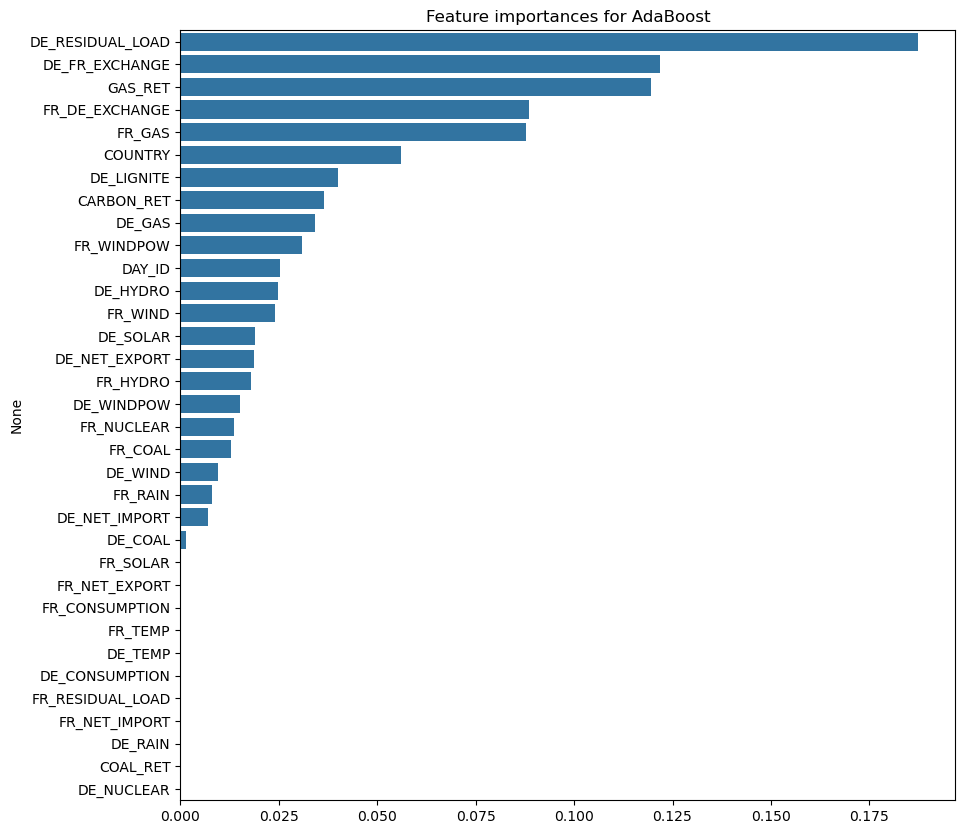

In [24]:
feature_importances = best_model_ada.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 10))
plt.title("Feature importances for AdaBoost")
sns.barplot(x=feature_importances[indices], y=X_train.columns[indices])
plt.show()